<a href="https://colab.research.google.com/github/NguyenTrang308/Co2/blob/main/Cleandata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone 'https://github.com/NguyenTrang308/Co2'

Cloning into 'Co2'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 74 (delta 27), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (74/74), done.


In [ ]:
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
from mpl_toolkits import mplot3d

In [ ]:
# load dataset
data = pd.read_csv('/content/Co2/data.csv')
data.head()

,Unnamed: 0,Country,Year,Pop,Pop_den,CO2,Forest,GDP,ICVA,ElecC,ElecG,FFC,NEC,REC,TEC
0,0,China,2020,1.439324e+09,153.0,NaN,219978.180,14866.741,5.568272e+12,7623.696272,7623.696272,NaN,NaN,NaN,NaN
1,1,China,2019,1.433784e+09,153.0,NaN,218041.394,14340.6,5.510257e+12,7326.700000,7326.700000,33512.486,863.457,4984.982,39360.925
2,2,China,2018,1.427648e+09,152.0,10800.00,216104.608,13841.812,5.514438e+12,6996.200000,6996.200000,32388.702,733.188,4592.223,37714.113
3,3,China,2017,1.421022e+09,151.0,10600.00,214167.822,12265.327,4.905907e+12,6448.700000,6448.700000,31527.347,620.250,4194.580,36342.177
4,4,China,2016,1.414049e+09,151.0,10400.00,212231.036,11226.897,4.446201e+12,6022.800000,6022.800000,30872.326,536.100,3855.695,35264.122


# Clean data

In [ ]:
# convert dtype of 'CO2', 'GDP' to float
# drop rows which have year < 1990
# drop row have Nan vlaue in 'Country' column
# drop rows have 4 or more Nan values
data = data.drop(data.columns[[0]], axis = 1)
data['CO2'] = data['CO2'].iloc[:].apply(pd.to_numeric, errors='coerce')
data['GDP'] = data['GDP'].iloc[:].apply(pd.to_numeric, errors='coerce')
data = data.drop(data[data['Year'] < 1990].index, axis = 0)
data.dropna(subset = ['Country'], inplace = True)
data.dropna(thresh = 11, inplace = True)

KeyError: ignored

In [ ]:
# drop countries which have not data in any column
columns = list(data.columns[2:])
country = list(data['Country'].unique())

for c in country:
  for column in columns:
    x = data['Country'] == c
    y = data.loc[x, column].isnull().sum()
    z = data.loc[x, 'Country'].count()
    if y == z:
      data = data.drop(data.loc[x, 'Country'].index)
      break

KeyError: ignored

In [ ]:
# fill Nan values
data['Year'] = (data['Year'].astype('i8')-1970).view('datetime64[Y]')
data = data.pivot(index='Year', columns='Country')

data = data.resample('A').mean()
data = data.interpolate(method='time')

data = data.stack('Country')
data = data.reset_index()
data = data.sort_values(by=['Country', 'Year'])
data = data.dropna()
data['Year'] = data['Year'].dt.year.astype(int)

data.info()

In [ ]:
data_n = data.copy()

In [ ]:
#Normalize data 
for column in list(data.columns[2:]):
  data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
data.head()

,Year,Country,Pop,Pop_den,CO2,Forest,GDP,ICVA,ElecC,ElecG,FFC,NEC,REC,TEC
648,1999,Algeria,0.021149,0.001303,0.008467,0.001948,0.002230,0.003134,0.000028,0.003322,0.009005,0.0,0.000113,0.007425
720,2000,Algeria,0.021468,0.001327,0.008096,0.001937,0.002506,0.004566,0.003261,0.003204,0.008675,0.0,0.000030,0.007134
792,2001,Algeria,0.021762,0.001351,0.007763,0.001978,0.002506,0.004102,0.003416,0.003359,0.008998,0.0,0.000038,0.007410
864,2002,Algeria,0.022056,0.001375,0.008365,0.002020,0.002600,0.004100,0.003548,0.003490,0.009332,0.0,0.000031,0.007693
936,2003,Algeria,0.022350,0.001399,0.008476,0.002062,0.003120,0.005182,0.003796,0.003739,0.009761,0.0,0.000145,0.008073


In [ ]:
data_n.head()

,Year,Country,Pop,Pop_den,CO2,Forest,GDP,ICVA,ElecC,ElecG,FFC,NEC,REC,TEC
648,1999,Algeria,3.058459e+07,12.799672,93.9,1587.8,48.845,1.744299e+10,0.20300,24.75700,310.834,0.0,0.564,311.398
720,2000,Algeria,3.104224e+07,13.000000,89.9,1579.0,54.749,2.533974e+10,23.88952,23.88952,299.786,0.0,0.150,299.936
792,2001,Algeria,3.146350e+07,13.199890,86.3,1612.9,54.745,2.278262e+10,25.03064,25.03064,310.611,0.0,0.190,310.801
864,2002,Algeria,3.188477e+07,13.399781,92.8,1646.8,56.761,2.277293e+10,25.99154,25.99154,321.784,0.0,0.156,321.941
936,2003,Algeria,3.230604e+07,13.599671,94.0,1680.7,67.864,2.873908e+10,27.80964,27.80964,336.154,0.0,0.722,336.876


# Data Visualization

In [ ]:
data_new = data.drop(data[data['Year'] > 2018].index, axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 648 to 2159
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     1980 non-null   int64  
 1   Country  1980 non-null   object 
 2   Pop      1980 non-null   float64
 3   Pop_den  1980 non-null   float64
 4   CO2      1980 non-null   float64
 5   Forest   1980 non-null   float64
 6   GDP      1980 non-null   float64
 7   ICVA     1980 non-null   float64
 8   ElecC    1980 non-null   float64
 9   ElecG    1980 non-null   float64
 10  FFC      1980 non-null   float64
 11  NEC      1980 non-null   float64
 12  REC      1980 non-null   float64
 13  TEC      1980 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 312.0+ KB


In [ ]:
fig = px.line(data_new,
              x="Year",
              y="CO2",
              hover_name = 'Country',
              hover_data=['Country','CO2'],
              color='Country',
              labels={'Country':'Country','Annual CO₂ emissions (tonnes )':'CO₂ Emission'},
              height=600)

fig.update_layout(title="Change in CO₂ Emission Between Years 1990 and 2018 - Countries",
                  title_x=0.50)

fig.update_layout(showlegend = False)
fig.update(layout_coloraxis_showscale = True)

fig.show()

In [ ]:
total_year = data_new.groupby("Year")["CO2"].sum()

data_total_year = pd.DataFrame(total_year)

data_total_year.reset_index(level=0, inplace=True)
fig = px.area(data_total_year,
              x="Year",
              y="CO2",
              hover_name = 'Year',
              hover_data=['Year','CO2'],

              labels={'Year':'Year','CO2':'CO₂'},
              height=600)

fig.update_layout(title="Change in CO₂ Emission Between Years 1990 and 2018",
                  title_x=0.50)

fig.update_layout(showlegend = False)

fig.update(layout_coloraxis_showscale = True)

fig.show()

In [ ]:
# 3D plot
df = px.data.iris()
fig = px.scatter_3d(data_new, x='Pop', y='ElecC', z='CO2',
              color='Country')
fig.show()

# Explore data analysis

In [ ]:
# mean of CO2 in 2019
mean = {}
for year in sorted(list(data_n['Year'].unique())):
  mean[year] = data_n.loc[data_n['Year'] == year, 'CO2'].mean()
print(mean)

{1990: 195.04899999999998, 1991: 219.20404761904766, 1992: 255.0761224489796, 1993: 257.275, 1994: 276.9456862745098, 1995: 242.28984375, 1996: 249.00609374999996, 1997: 338.2269696969697, 1998: 332.28283582089557, 1999: 332.64602941176463, 2000: 333.1242857142857, 2001: 335.62157142857143, 2002: 343.43600000000004, 2003: 360.4875714285714, 2004: 376.92428571428565, 2005: 390.02042857142857, 2006: 402.6569999999999, 2007: 414.757, 2008: 423.0177142857143, 2009: 417.035, 2010: 434.22394366197193, 2011: 443.9733333333333, 2012: 451.9034722222223, 2013: 457.25041666666664, 2014: 463.0558333333335, 2015: 462.3529166666666, 2016: 463.6552777777779, 2017: 468.8376388888889, 2018: 477.90472222222223, 2019: 477.90472222222223}


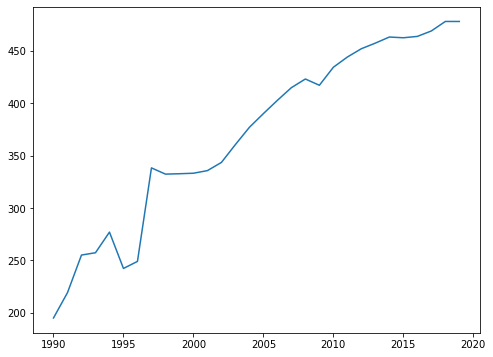

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(list(mean.keys()), list(mean.values()))

In [ ]:
data_n.loc[data_n['Year'] == 2019].describe()

,Year,Pop,Pop_den,CO2,Forest,GDP,ICVA,ElecC,ElecG,FFC,NEC,REC,TEC
count,72.0,7.200000e+01,72.000000,72.000000,72.000000,72.000000,7.200000e+01,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,2019.0,8.399492e+07,260.138889,477.904722,43267.266049,1150.722667,3.009675e+11,338.619852,338.619852,1788.044000,93.398361,238.628556,2120.856208
std,0.0,2.331039e+08,977.450151,1434.542677,124097.512430,3053.935487,7.999821e+11,990.862767,990.862767,4758.654997,295.942148,670.596467,5606.729497
min,2019.0,3.390310e+05,3.000000,3.680000,0.000000,23.208000,3.301581e+09,0.956933,0.956933,12.561000,0.000000,0.009000,32.400000
25%,2019.0,5.907651e+06,31.000000,45.525000,1259.218500,132.111750,3.520223e+10,38.230749,38.230749,189.707000,0.000000,9.761750,286.242750
50%,2019.0,2.034414e+07,92.500000,95.050000,4928.965000,337.717000,9.002208e+10,79.098083,79.098083,490.943000,0.000000,61.690500,562.068500
75%,2019.0,6.169499e+07,221.750000,349.000000,18721.998000,768.628500,1.909362e+11,262.465968,262.465968,1438.991000,40.104750,151.195000,1634.554250
max,2019.0,1.433784e+09,8292.000000,10800.000000,815235.372000,21372.600000,5.510257e+12,7326.700000,7326.700000,33512.486000,2109.762000,4984.982000,39360.925000


In [ ]:
variables = ['Pop', 'Pop_den', 'Forest', 'GDP', 'ICVA', 'ElecC', 'ElecG', 'FFC', 'REC', 'NEC', 'TEC']
for column in variables:
  pearson_coef, p_value = stats.pearsonr(data[column], data['CO2'])
  print(column + ' and CO2')
  print("P-value =", p_value)

Pop and CO2
P-value = 2.854660457142281e-299
Pop_den and CO2
P-value = 0.13054377048784424
Forest and CO2
P-value = 2.1957840420946175e-72
GDP and CO2
P-value = 0.0
ICVA and CO2
P-value = 0.0
ElecC and CO2
P-value = 0.0
ElecG and CO2
P-value = 0.0
FFC and CO2
P-value = 0.0
REC and CO2
P-value = 0.0
NEC and CO2
P-value = 2.2372540520310217e-184
TEC and CO2
P-value = 0.0


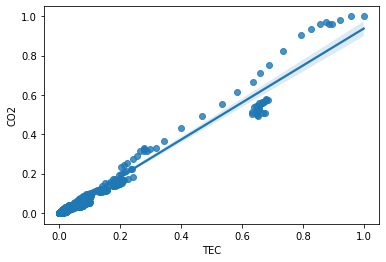

In [ ]:
sb.regplot(x = 'TEC', y = 'CO2', data = data)

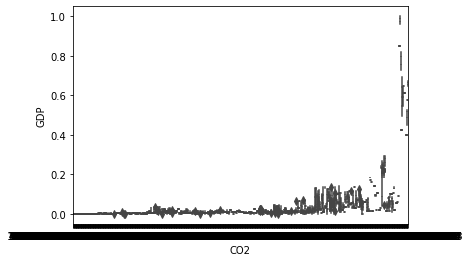

In [ ]:
sb.boxplot(x = 'CO2', y = 'GDP', data = data)

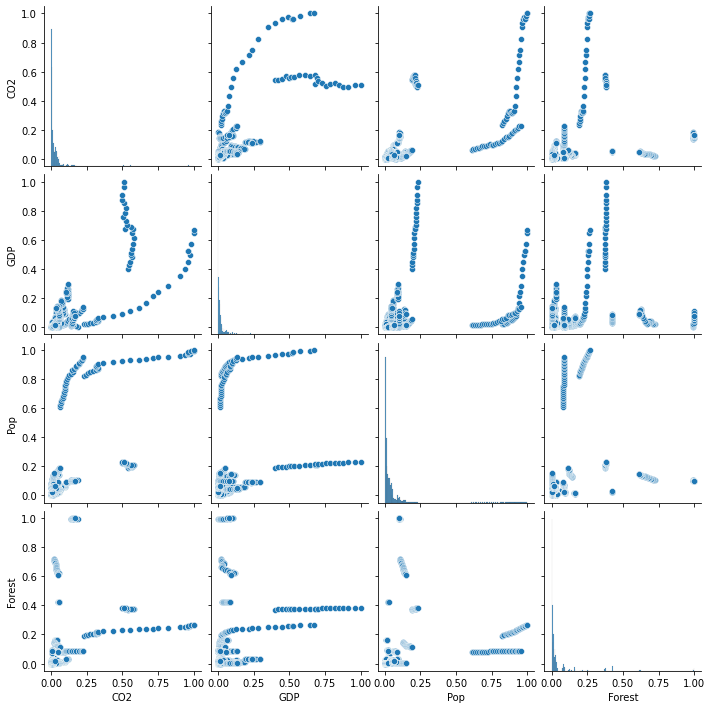

In [ ]:
sb.pairplot(data[['CO2', 'GDP', 'Pop', 'Forest']])

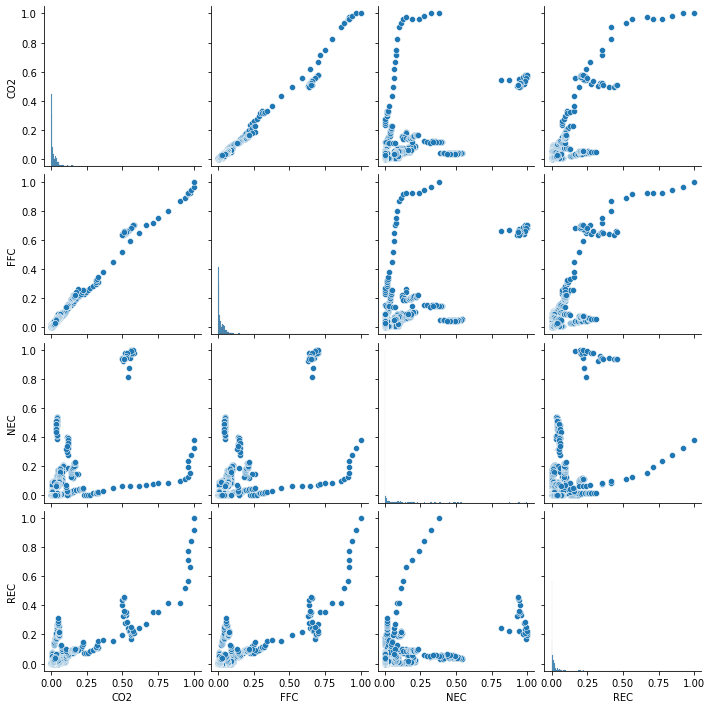

In [ ]:
sb.pairplot(data[['CO2', 'FFC', 'NEC', 'REC']])

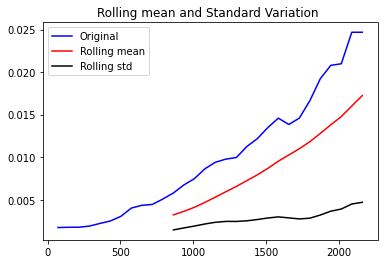

In [ ]:
def rolling_plot(ts):
  rolmean = ts.rolling(12).mean()
  rolstd = ts.rolling(12).std()
  orig = plt.plot(ts, color = 'blue', label = 'Original')
  mean = plt.plot(rolmean, color = 'red', label = 'Rolling mean')
  std = plt.plot(rolstd, color = 'black', label = 'Rolling std')
  plt.legend(loc = 'best')
  plt.title('Rolling mean and Standard Variation ')
  plt.show(block = False)
rolling_plot(data.loc[data['Country'] == 'Vietnam', 'CO2'])

In [ ]:
for column in variables:
  print(column + ' CO2')
  print(np.cov(data['CO2'], data[column]))

Pop CO2
[[0.00995148 0.01042547]
 [0.01042547 0.02188333]]
Pop_den CO2
[[ 0.00995148 -0.00032446]
 [-0.00032446  0.00915605]]
Forest CO2
[[0.00995148 0.0059448 ]
 [0.0059448  0.02351512]]
GDP CO2
[[0.00995148 0.00705806]
 [0.00705806 0.00790988]]
ICVA CO2
[[0.00995148 0.00796435]
 [0.00796435 0.00787767]]
ElecC CO2
[[0.00995148 0.00844545]
 [0.00844545 0.00757134]]
ElecG CO2
[[0.00995148 0.0084396 ]
 [0.0084396  0.00756181]]
FFC CO2
[[0.00995148 0.01070197]
 [0.01070197 0.01172494]]
REC CO2
[[0.00995148 0.00586153]
 [0.00586153 0.0050065 ]]
NEC CO2
[[0.00995148 0.00737532]
 [0.00737532 0.01581592]]
TEC CO2
[[0.00995148 0.01027914]
 [0.01027914 0.01092348]]


In [ ]:
data1 = data.drop(data.columns[[0]], axis = 1)
co2_corr = data1.corr()
co2_corr

,Pop,Pop_den,CO2,Forest,GDP,ICVA,ElecC,ElecG,FFC,NEC,REC,TEC
Pop,1.000000,-0.003547,0.706472,0.254127,0.366821,0.498405,0.604292,0.603795,0.665365,0.166730,0.569769,0.647409
Pop_den,-0.003547,1.000000,-0.033990,-0.077555,-0.023301,-0.021716,-0.035756,-0.035298,-0.022491,-0.035943,-0.058819,-0.027373
CO2,0.706472,-0.033990,1.000000,0.388616,0.795531,0.899514,0.972954,0.972893,0.990751,0.587882,0.830424,0.985899
Forest,0.254127,-0.077555,0.388616,1.000000,0.301355,0.293353,0.409508,0.408731,0.428769,0.310304,0.538191,0.445854
GDP,0.366821,-0.023301,0.795531,0.301355,1.000000,0.939141,0.892439,0.892409,0.841902,0.820697,0.736082,0.862544
ICVA,0.498405,-0.021716,0.899514,0.293353,0.939141,1.000000,0.954588,0.954533,0.910180,0.696589,0.829486,0.922240
ElecC,0.604292,-0.035756,0.972954,0.409508,0.892439,0.954588,1.000000,0.999915,0.981514,0.706265,0.869815,0.989295
ElecG,0.603795,-0.035298,0.972893,0.408731,0.892409,0.954533,0.999915,1.000000,0.981437,0.707581,0.869492,0.989290
FFC,0.665365,-0.022491,0.990751,0.428769,0.841902,0.910180,0.981514,0.981437,1.000000,0.660038,0.815589,0.997762
NEC,0.166730,-0.035943,0.587882,0.310304,0.820697,0.696589,0.706265,0.707581,0.660038,1.000000,0.481086,0.692565


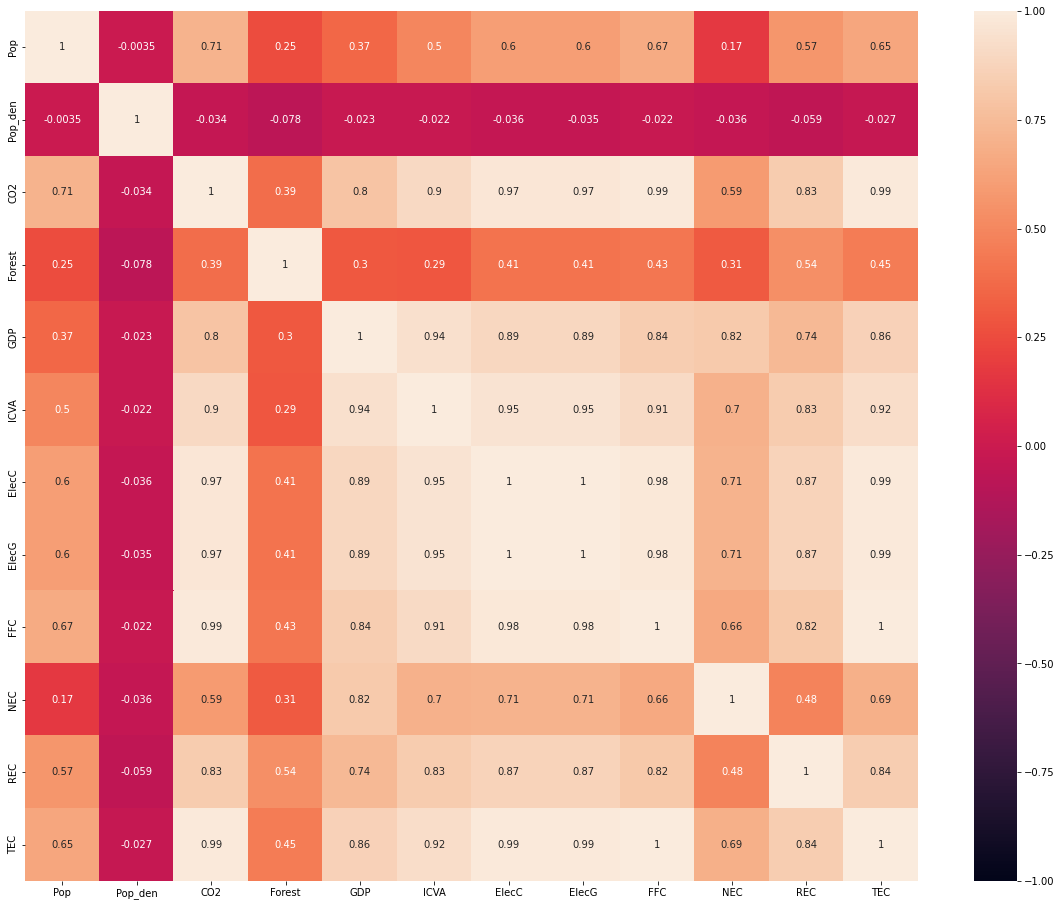

In [ ]:
fig, ax = plt.subplots(figsize=(20,16))
sb.heatmap(data=co2_corr, annot=True, vmin=-1, vmax=1)